In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir("../input/superstore-data")

['superstore_dataset2011-2015.csv']

In [3]:
data = pd.read_csv("../input/superstore-data/superstore_dataset2011-2015.csv", encoding="ISO-8859-1")

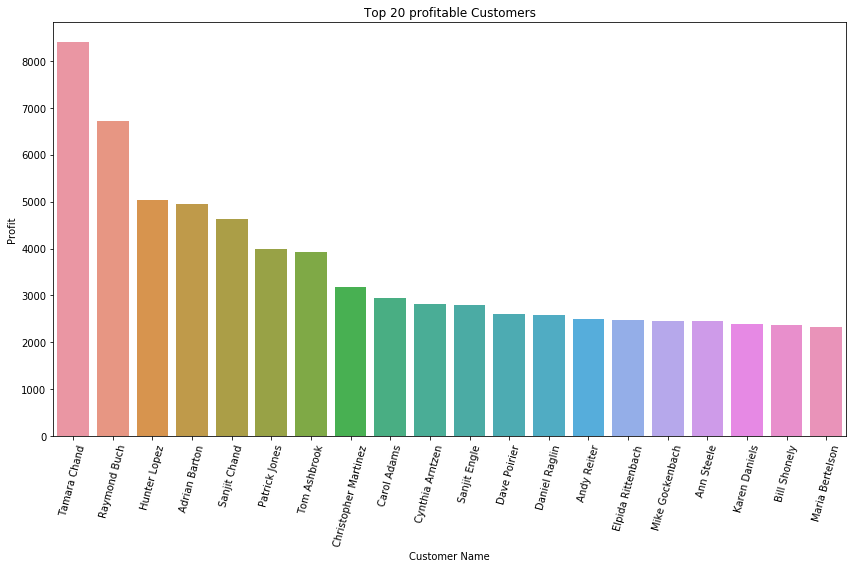

In [4]:
#Top 20 most profitable customers
sortedTop20 = data.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

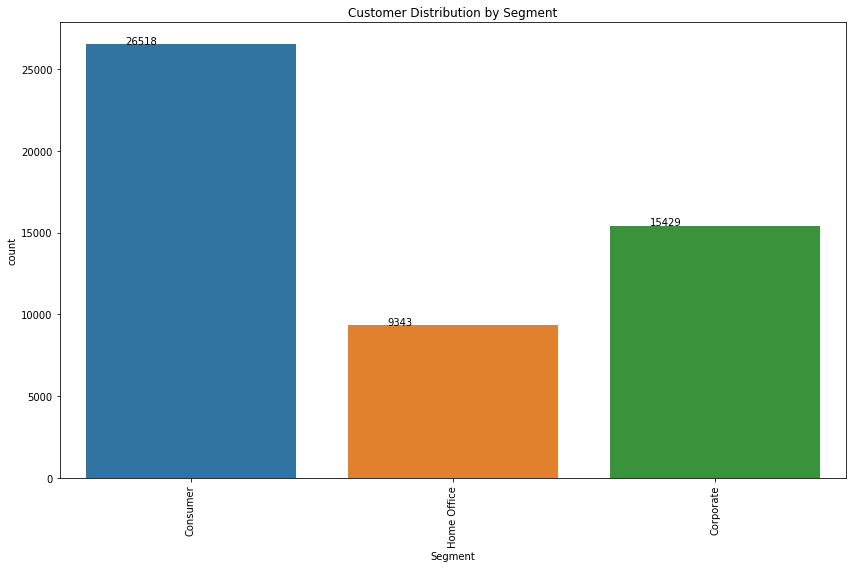

In [5]:
#What is the distribution of our customer segment
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.countplot(x="Segment", data=data, ax=ax)
ax.set_title("Customer Distribution by Segment")
ax.set_xticklabels(p.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.tight_layout()
plt.show()

In [6]:
#3. Who are our top-20 oldest customers
oldCustomers = data.sort_values(["Order Date"], ascending=True).iloc[0:20,6]
oldCustomers

0        Toby Braunhardt
1            Joseph Holt
2          Annie Thurman
3           Eugene Moren
4            Joseph Holt
5            Joseph Holt
7809        Chris Cortes
7810           Joy Smith
7811        Chris Cortes
7812       Liz Pelletier
7816         Jim Radford
7815      Troy Blackwell
7808     Muhammed Yedwab
7817          Joe Elijah
7818         Jim Radford
7813    Stephanie Phelps
7807     Muhammed Yedwab
7814     Patrick Bzostek
7805     Muhammed Yedwab
7806      Nora Pelletier
Name: Customer Name, dtype: object

In [7]:
#Year-wise sales and profit
data["Order_Year"] = pd.to_datetime(data["Order Date"])
data["Year"] = data["Order_Year"].dt.year



In [8]:
yearwiseSalesAndProfit = data.groupby("Year").agg({"Sales":np.sum, "Profit": np.sum})
yearwiseSalesAndProfit

,Sales,Profit
Year,,
2011,2.259451e+06,248940.81154
2012,2.677439e+06,307415.27910
2013,3.405746e+06,406935.23018
2014,4.299866e+06,504165.97046


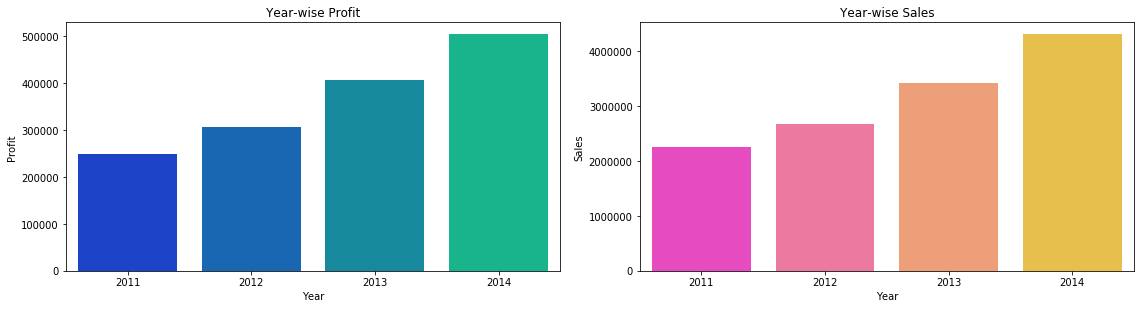

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(221)
p=sns.barplot(x=yearwiseSalesAndProfit.index,y="Profit", data=yearwiseSalesAndProfit, palette="winter", ax=ax)
ax.set_title("Year-wise Profit")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
ax = fig.add_subplot(222)
p=sns.barplot(x=yearwiseSalesAndProfit.index,y="Sales", data=yearwiseSalesAndProfit, palette="spring", ax=ax)
ax.set_title("Year-wise Sales")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

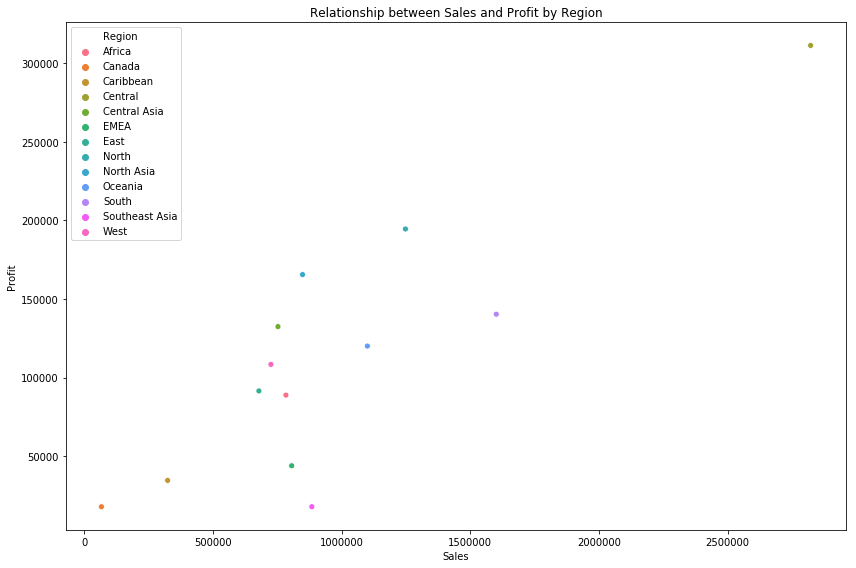

In [10]:
#Relationship between sales and profit -- use scatter plot
regionwiseSalesAndProfit = data.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum})
regionwiseSalesAndProfit
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=regionwiseSalesAndProfit.index, data=regionwiseSalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Region")
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


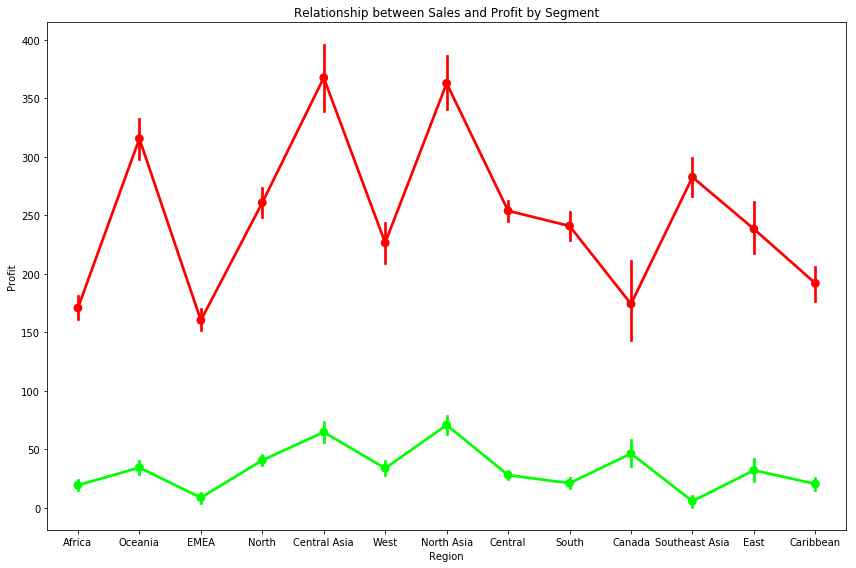

In [11]:
#Relationship between sales and profit -- using scatter plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.pointplot(x="Region", y="Sales", data=data, color="Red", alpha=0.8) # kind="scatter")
p2 = sns.pointplot(x="Region", y="Profit", data=data, color="Lime", alpha=0.8) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Segment")
plt.tight_layout()
plt.show()
